### **GETTING REQUIRED LIBRARIES**

Importing all the required libraries which are required in the task

In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


### **READING THE DATA SET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ml/archive (6).zip')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ml/archive (6).zip'

This command will give us the data types of the each column present in the data frame

In [ ]:
train.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

This command will print the first five rows of the data frame

In [ ]:
train.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


This command will print the last five rows of the data frame

In [ ]:
train.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


since we have number column already we are removing the extra number coluns

In [ ]:
train.drop('No',inplace=True,axis=1)

In [ ]:
train.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

### **CHECKING THE DATASET**

This command will update us the info regarding the columns of the data frame and also provide number of non null values

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


This command will give us the information regarding various parameters like mean count standard deviation quartile ranges

In [ ]:
train.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Checks whether there are any missing values

In [ ]:
train.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Checks whether there are any duplicated rows

In [ ]:
train.duplicated().sum()

0

This code will print the number of unique values in each column of the data frame

In [ ]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")

Column 'X1 transaction date' has 12 unique values.
Column 'X2 house age' has 236 unique values.
Column 'X3 distance to the nearest MRT station' has 259 unique values.
Column 'X4 number of convenience stores' has 11 unique values.
Column 'X5 latitude' has 234 unique values.
Column 'X6 longitude' has 232 unique values.
Column 'Y house price of unit area' has 270 unique values.


### **COLUMNS OF THE DATASET**

In [ ]:
train.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### **CORRELATION MATRIX**

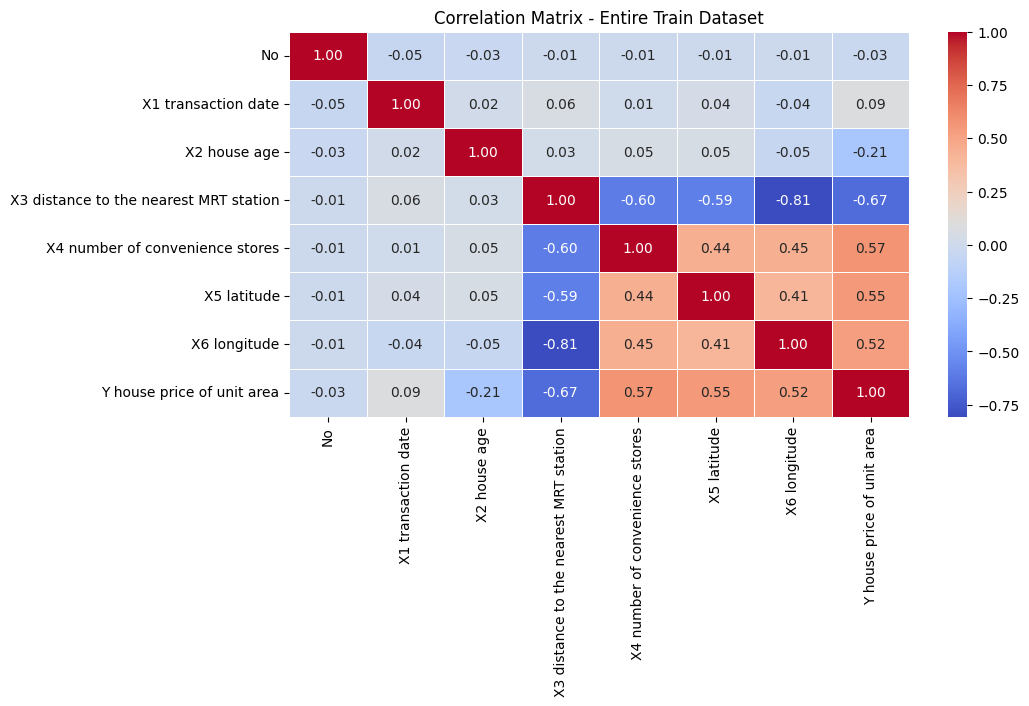

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train' with your dataset
train = pd.read_csv('/content/drive/MyDrive/ml/archive (6).zip')

# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()

In [ ]:
train.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Here we can see that the number of convenience store is the feature that has maximum correlation with House Price per unit area
: If the correlation coefficient is >= 0.5, it means that there is a relationship between the variables.

If the correlation coefficient is less than 0.5, there is no relationship between variables.

# **EDA**

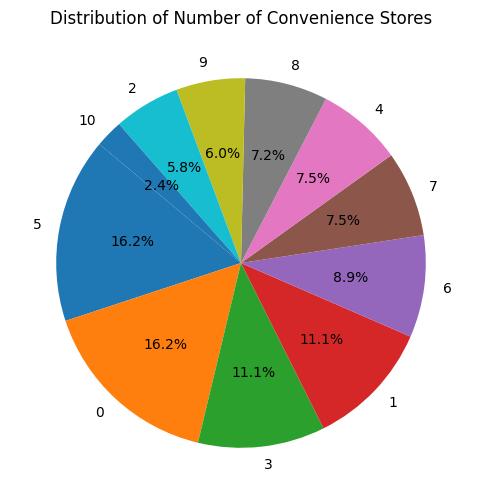

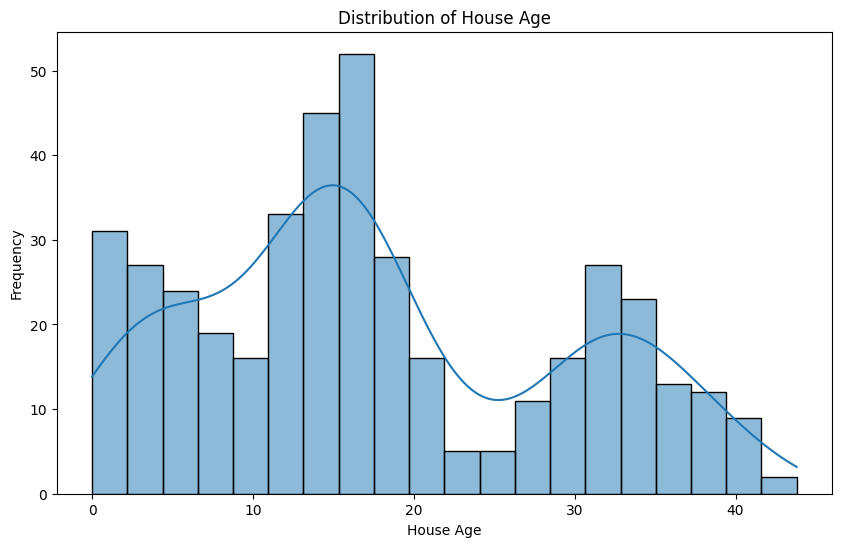

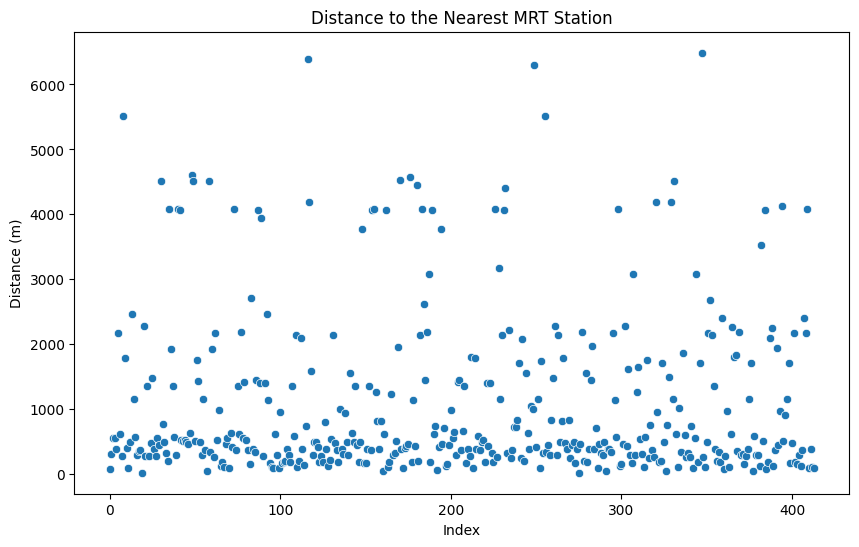

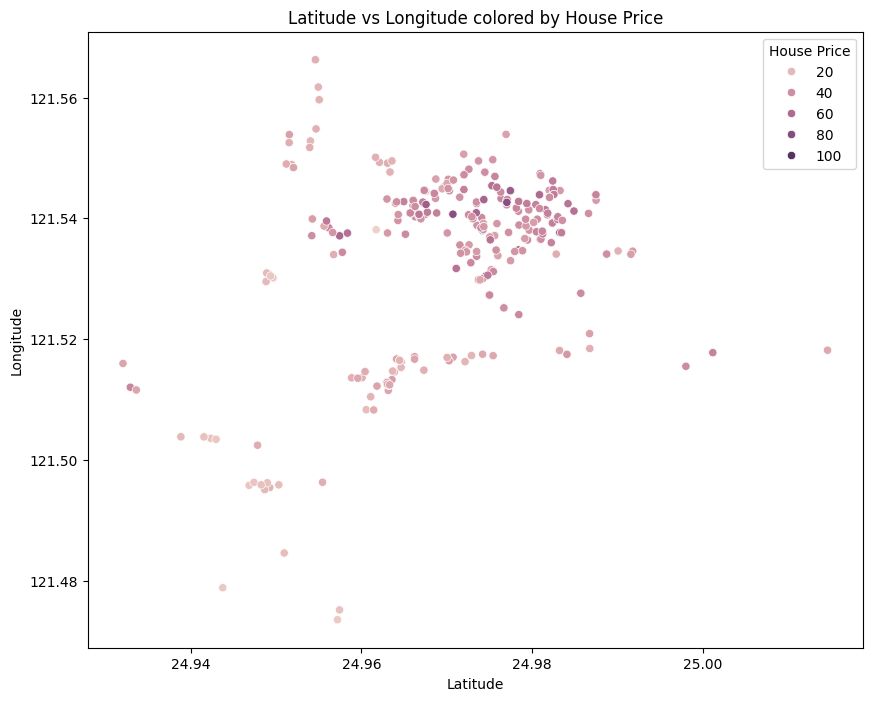

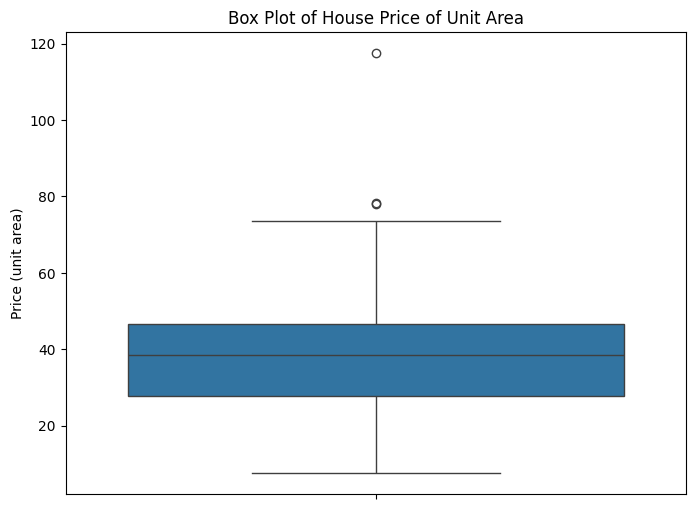

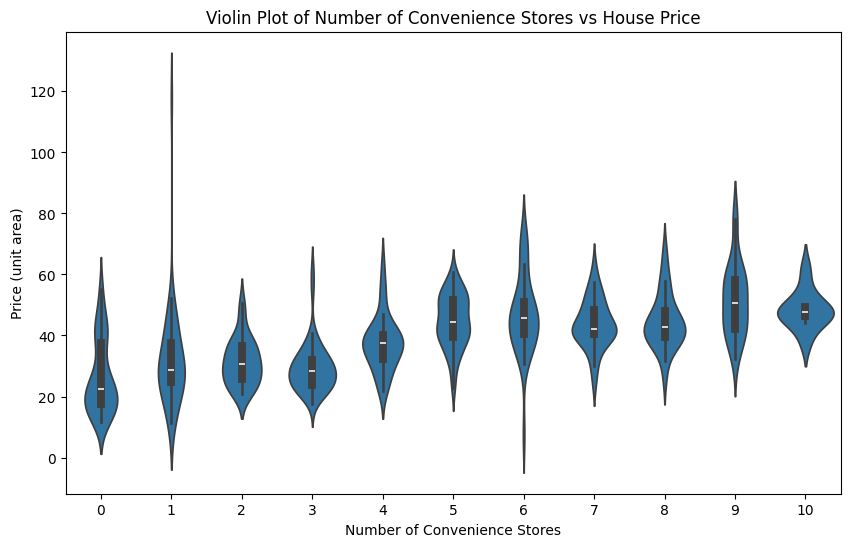

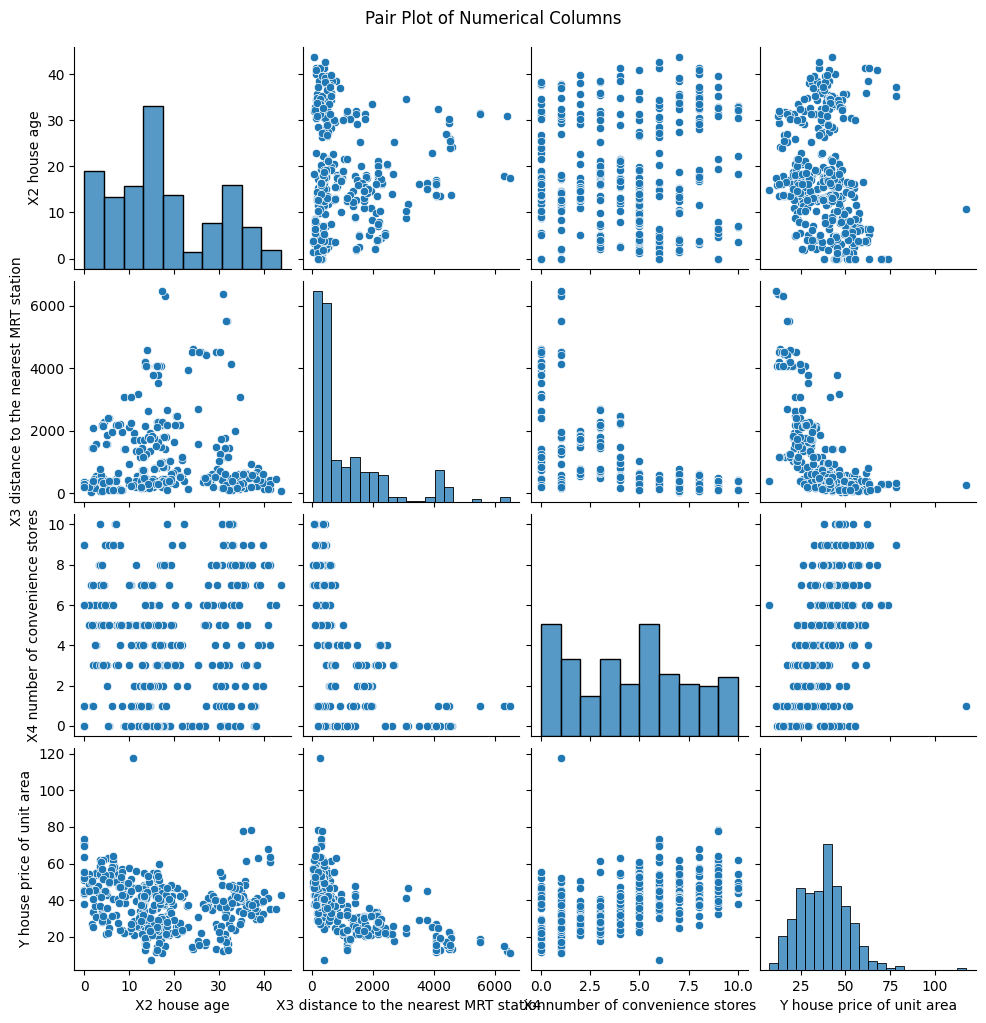

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset into a DataFrame called 'train'

# Pie chart for the distribution of 'X4 number of convenience stores'
plt.figure(figsize=(8, 6))
train['X4 number of convenience stores'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Number of Convenience Stores')
plt.ylabel('')
plt.show()

# Bar plot for 'X2 house age'
plt.figure(figsize=(10, 6))
sns.histplot(train['X2 house age'], bins=20, kde=True)
plt.title('Distribution of House Age')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()

# Univariate scatter plot for 'X3 distance to the nearest MRT station'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train.index, y='X3 distance to the nearest MRT station', data=train)
plt.title('Distance to the Nearest MRT Station')
plt.xlabel('Index')
plt.ylabel('Distance (m)')
plt.show()

# Bivariate scatter plot for 'X5 latitude' vs 'X6 longitude' colored by 'Y house price of unit area'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X5 latitude', y='X6 longitude', hue='Y house price of unit area', data=train)
plt.title('Latitude vs Longitude colored by House Price')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='House Price')
plt.show()

# Box plot for 'Y house price of unit area'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Y house price of unit area', data=train)
plt.title('Box Plot of House Price of Unit Area')
plt.ylabel('Price (unit area)')
plt.show()

# Violin plot for 'X4 number of convenience stores' vs 'Y house price of unit area'
plt.figure(figsize=(10, 6))
sns.violinplot(x='X4 number of convenience stores', y='Y house price of unit area', data=train)
plt.title('Violin Plot of Number of Convenience Stores vs House Price')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Price (unit area)')
plt.show()

# Pair plot for numerical columns
sns.pairplot(train[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()


# New Section

## X2 house age VS Y house price of unit area

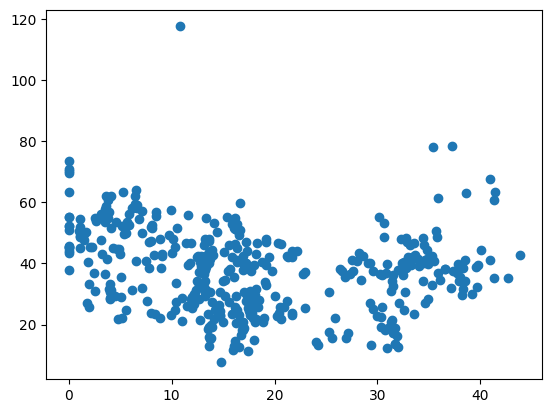

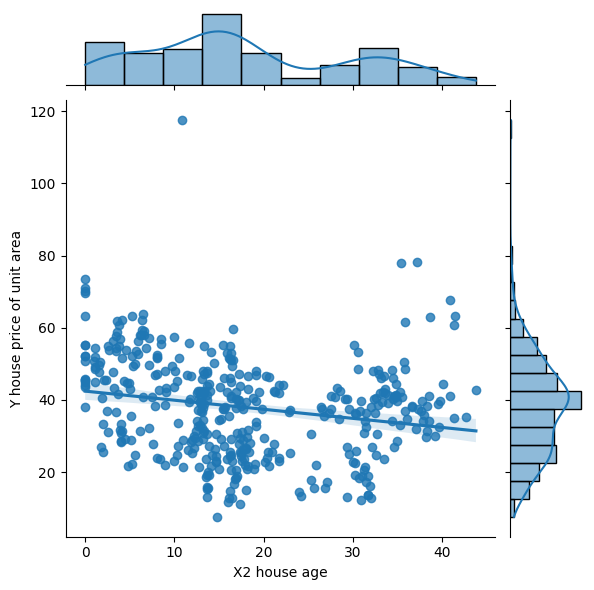

In [ ]:
#House Age vs House Price Plot
plt.scatter(train['X2 house age'],train['Y house price of unit area'])
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2 house age', y='Y house price of unit area', data=train, kind="reg")

House Age (X2) doesn't show a correlation with house price (Y) because of its small corr value.

## X3 distance to the nearest MRT station VS Y house price of unit area

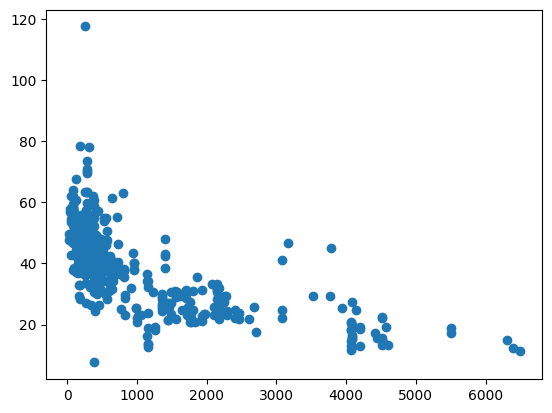

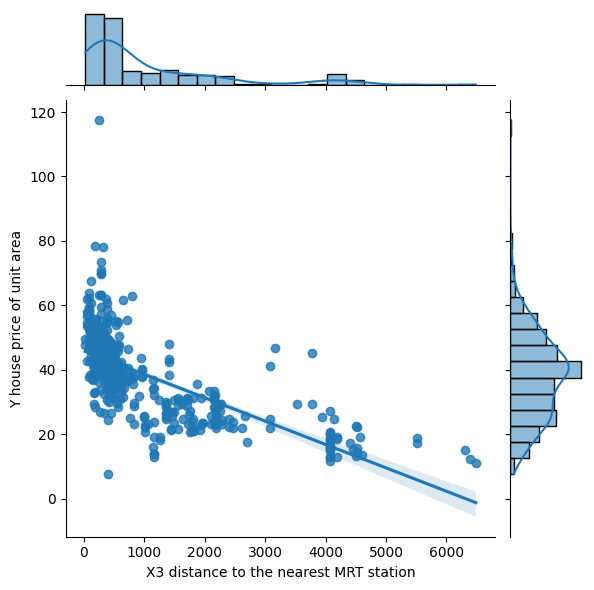

In [ ]:

plt.scatter(train['X3 distance to the nearest MRT station'],train['Y house price of unit area'])
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=train, kind="reg")

There is a negative relationship between the distance to the MRT (X3) around the housing area and the house price per unit (Y). In other words, the closer the distance to the MRT, the higher the house price or the further the distance to the MRT, the lower the house price.

## X4 number of convenience stores VS Y house price of unit area

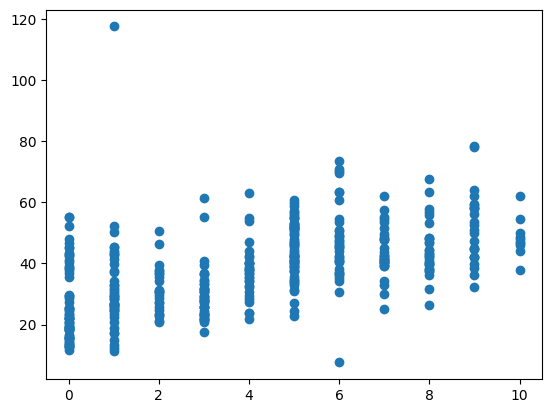

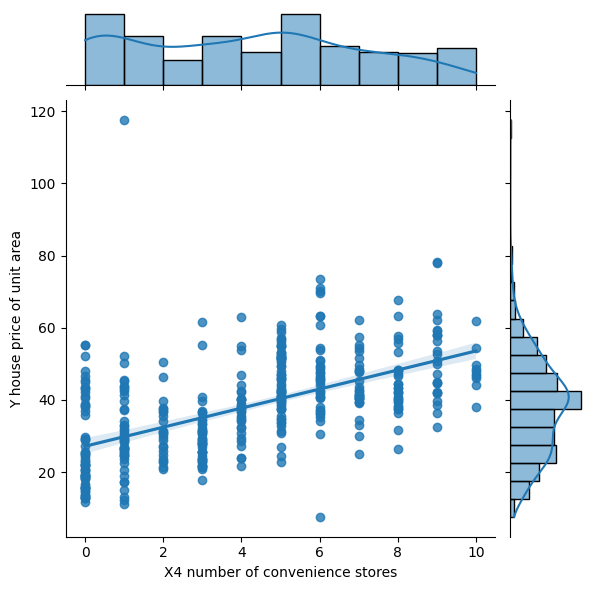

In [ ]:

plt.scatter(train['X4 number of convenience stores'],train['Y house price of unit area'])
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4 number of convenience stores', y='Y house price of unit area', data=train, kind="reg")

There is a positive relationship between the number of shopping centers (X4) around the housing area and the house price (Y). It can be said that the more shopping centers there are, the higher the house price will be, and vice versa

## X5 latitude VS Y house price of unit area

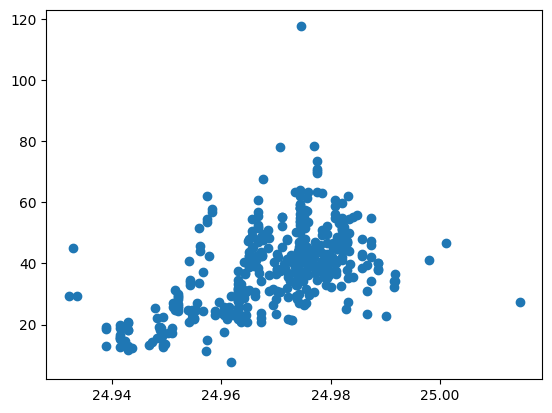

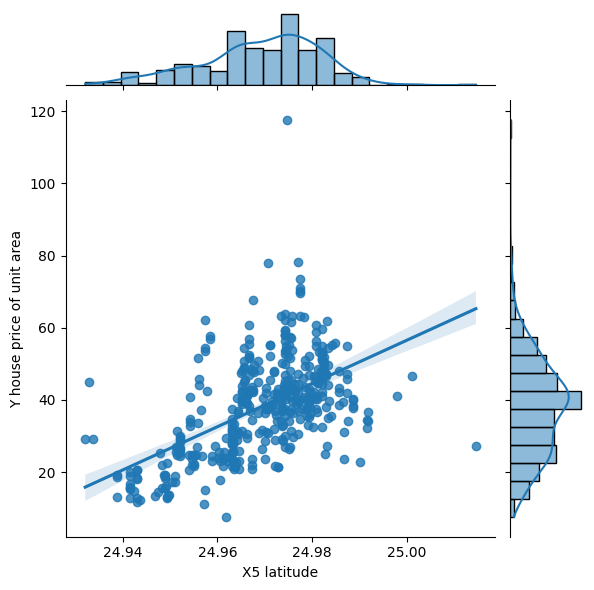

In [ ]:

plt.scatter(train['X5 latitude'],train['Y house price of unit area'])
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5 latitude', y='Y house price of unit area', data=train, kind="reg")

There is a positive relationship between latitude (geographic location) and house price

## X6 longitude VS Y house price of unit area

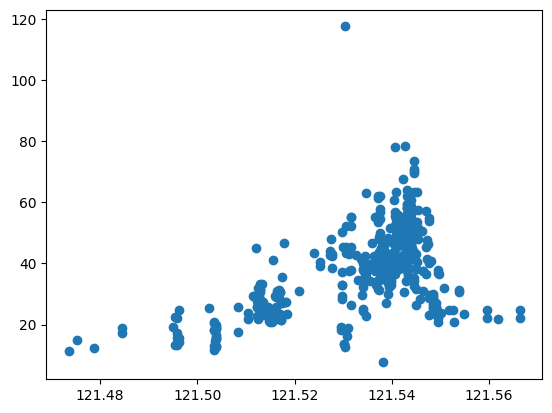

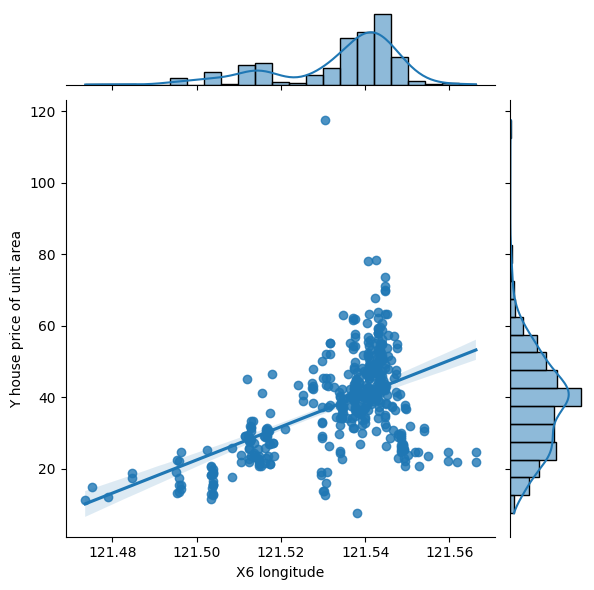

In [ ]:

plt.scatter(train['X6 longitude'],train['Y house price of unit area'])
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6 longitude', y='Y house price of unit area', data=train, kind="reg")

There is a positive or aligned relationship between longitude (map location) and house price.

# **POLYNOMIAL REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ml/archive (6).zip')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Extract features (X) and target variable (Y)
X = dataset[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = dataset['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Train RMSE:", train_rmse)
print("Linear Regression Test RMSE:", test_rmse)
print("Linear Regression Train R^2 score:", train_r2)
print("Linear Regression Test R^2 score:", test_r2)


Linear Regression Train RMSE: 9.116659612434566
Linear Regression Test RMSE: 7.314753524521828
Linear Regression Train R^2 score: 0.5581197274607117
Linear Regression Test R^2 score: 0.6810580555095801


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ml/archive (6).zip')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Extract features (X) and target variable (Y)
X = dataset[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = dataset['Y house price of unit area']

# Generate polynomial features
degree = 2  # Adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Polynomial Regression Train RMSE:", train_rmse)
print("Polynomial Regression Test RMSE:", test_rmse)
print("Polynomial Regression Train R^2 score:", train_r2)
print("Polynomial Regression Test R^2 score:", test_r2)


Polynomial Regression Train RMSE: 7.634508122624192
Polynomial Regression Test RMSE: 6.392956969561479
Polynomial Regression Train R^2 score: 0.6901187805223352
Polynomial Regression Test R^2 score: 0.7563783914219574


# New Section

In [ ]:
pip install cutecharts


In [ ]:
import pandas as pd
from cutecharts.charts import Bar
from cutecharts.components import Page

# Assuming you have a DataFrame train with columns 'X4 number of convenience stores' and 'Y house price of unit area'
# Extract the columns
X4 = train['X4 number of convenience stores']
Y = train['Y house price of unit area']

# Create a bar chart
chart = Bar("House Price vs. Number of Convenience Stores")
chart.set_options(labels=list(X4), x_label="Number of Convenience Stores", y_label="House Price")
chart.add_series("Price", Y)

# Render the chart
chart_page = Page()
chart_page.add(chart)
chart_page.render("bar_chart.html")


NameError: name 'train' is not defined